In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import wget
from mpl_toolkits.basemap import Basemap
import chardet
import folium

In [67]:
with open("ev_stations_v1.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # 只检测前 100000 个字节
    print(result)  # 输出编码格式

# 使用检测到的编码格式读取 CSV
df = pd.read_csv("ev_stations_v1.csv", encoding=result["encoding"])

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


C:\Users\123\AppData\Local\Temp\ipykernel_51632\660258632.py:6: DtypeWarning: Columns (6,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ev_stations_v1.csv", encoding=result["encoding"])


In [3]:
selected_columns = ["Station Name", "Street Address", "City", "State", "ZIP", "Station Phone", "Groups With Access Code", 
                    "Access Days Time", "EV Level2 EVSE Num", "EV Network", "Geocode Status", "Date Last Confirmed", 
                    "ID", "Owner Type Code", "Open Date", "EV Connector Types", "Access Code", "Facility Type", "EV Pricing"]

In [4]:
df2 = df[['City', 'State']] # State and City

state = df2['State'].value_counts()
city = df2['City'].value_counts()

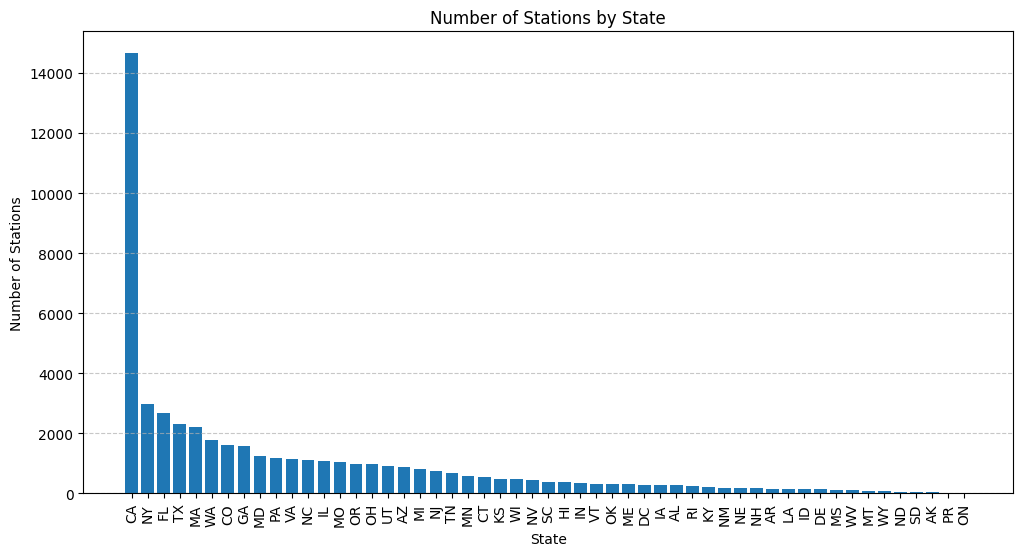

In [5]:
# Bar plot of number of stations by state
plt.figure(figsize=(12, 6))
plt.bar(state.index, state.values)
plt.xlabel("State")
plt.ylabel("Number of Stations")
plt.title("Number of Stations by State")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.show()

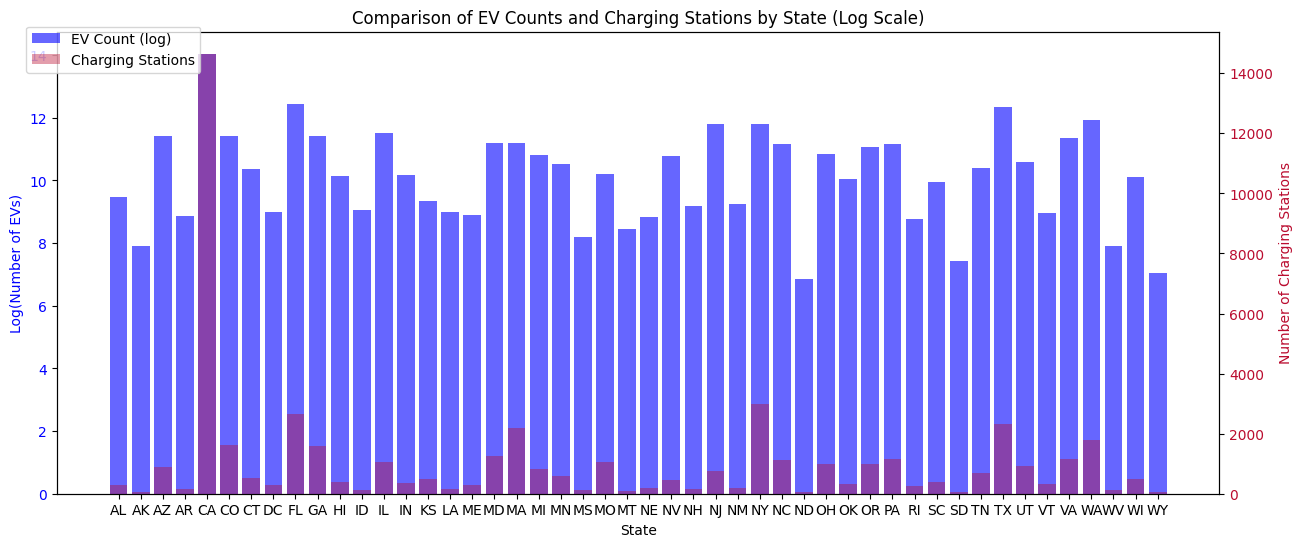

In [100]:
# Number of Stations vs Number of EV Registrations by State

ev_registration_by_state = {
    "AL": 13047, "AK": 2697, "AZ": 89798, "AR": 7108, "CA": 1256646,
    "CO": 90083, "CT": 31557, "DL": 8435, "DC": 8066, "FL": 254878,
    "GA": 92368, "HI": 25565, "ID": 8501, "IL": 99573, "IN": 26101,
    "IO": 9031, "KS": 11271, "KT": 11617, "LA": 8150, "ME": 7377,
    "MD": 72139, "MA": 73768, "MI": 50284, "MN": 37050, "MS": 3590,
    "MO": 26861, "MT": 4608, "NE": 6920, "NV": 47361, "NH": 9861,
    "NJ": 134753, "NM": 10276, "NY": 131250, "NC": 70164, "ND": 959,
    "OH": 50393, "OK": 22843, "OR": 64361, "PA": 70154, "RI": 6396,
    "SC": 20873, "SD": 1675, "TN": 33221, "TX": 230125, "UT": 39998,
    "VT": 7816, "VA": 84936, "WA": 152101, "WV": 2758, "WI": 24943, "WY": 1139
}

state_charging_counts = df["State"].value_counts()
charging_stations_df = pd.DataFrame({"State": state_charging_counts.index, "Charging_Stations": state_charging_counts.values})
ev_counts_df = pd.DataFrame(list(ev_registration_by_state.items()), columns=["State", "EV_Count"])
merged_df = pd.merge(ev_counts_df, charging_stations_df, on="State", how="inner")

merged_df["EV/Charging Ratio"] = merged_df["EV_Count"] / merged_df["Charging_Stations"]

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.bar(merged_df["State"], np.log1p(merged_df["EV_Count"]), color='b', alpha=0.6, label="EV Count (log)")
ax1.set_xlabel("State")
ax1.set_ylabel("Log(Number of EVs)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar(merged_df["State"], merged_df["Charging_Stations"], color='#BA0C2F', alpha=0.4, label="Charging Stations")
ax2.set_ylabel("Number of Charging Stations", color='#BA0C2F')
ax2.tick_params(axis='y', labelcolor='#BA0C2F')

plt.xticks(rotation=90)

plt.title("Comparison of EV Counts and Charging Stations by State (Log Scale)")

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

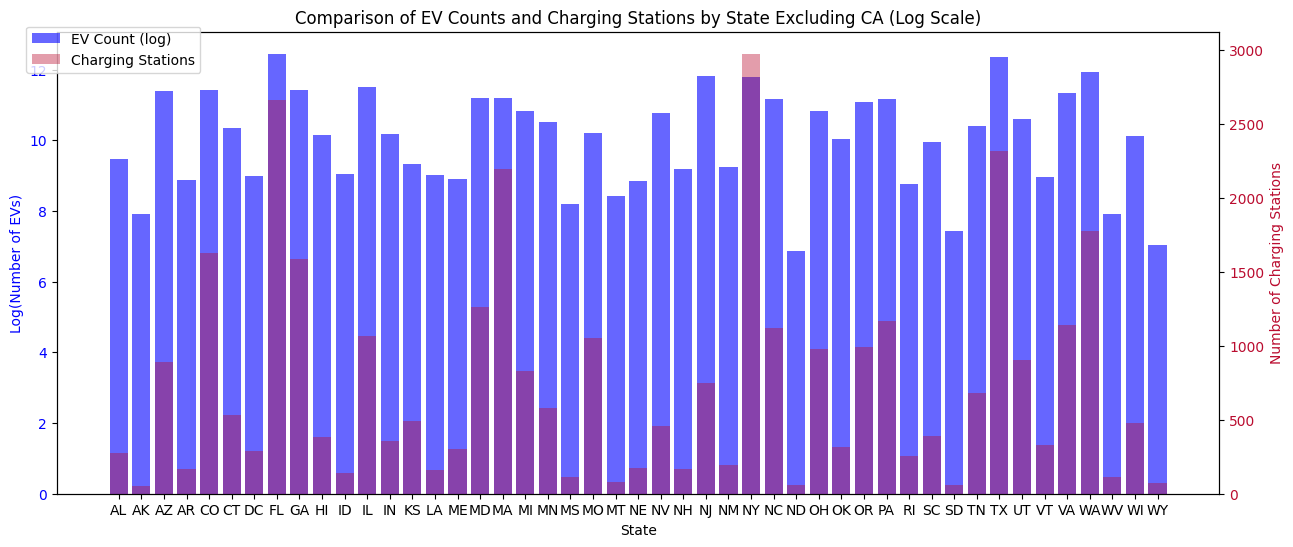

In [102]:
# Number of Stations vs Number of EV Registrations by State Excluding California

ev_registration_by_state = {
    "AL": 13047, "AK": 2697, "AZ": 89798, "AR": 7108, 
    "CO": 90083, "CT": 31557, "DL": 8435, "DC": 8066, "FL": 254878,
    "GA": 92368, "HI": 25565, "ID": 8501, "IL": 99573, "IN": 26101,
    "IO": 9031, "KS": 11271, "KT": 11617, "LA": 8150, "ME": 7377,
    "MD": 72139, "MA": 73768, "MI": 50284, "MN": 37050, "MS": 3590,
    "MO": 26861, "MT": 4608, "NE": 6920, "NV": 47361, "NH": 9861,
    "NJ": 134753, "NM": 10276, "NY": 131250, "NC": 70164, "ND": 959,
    "OH": 50393, "OK": 22843, "OR": 64361, "PA": 70154, "RI": 6396,
    "SC": 20873, "SD": 1675, "TN": 33221, "TX": 230125, "UT": 39998,
    "VT": 7816, "VA": 84936, "WA": 152101, "WV": 2758, "WI": 24943, "WY": 1139
}

state_charging_counts = df["State"].value_counts()
charging_stations_df = pd.DataFrame({"State": state_charging_counts.index, "Charging_Stations": state_charging_counts.values})
ev_counts_df = pd.DataFrame(list(ev_registration_by_state.items()), columns=["State", "EV_Count"])
merged_df = pd.merge(ev_counts_df, charging_stations_df, on="State", how="inner")

merged_df["EV/Charging Ratio"] = merged_df["EV_Count"] / merged_df["Charging_Stations"]

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.bar(merged_df["State"], np.log1p(merged_df["EV_Count"]), color='b', alpha=0.6, label="EV Count (log)")
ax1.set_xlabel("State")
ax1.set_ylabel("Log(Number of EVs)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar(merged_df["State"], merged_df["Charging_Stations"], color='#BA0C2F', alpha=0.4, label="Charging Stations")
ax2.set_ylabel("Number of Charging Stations", color='#BA0C2F')
ax2.tick_params(axis='y', labelcolor='#BA0C2F')

plt.xticks(rotation=90)

plt.title("Comparison of EV Counts and Charging Stations by State Excluding CA (Log Scale)")

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

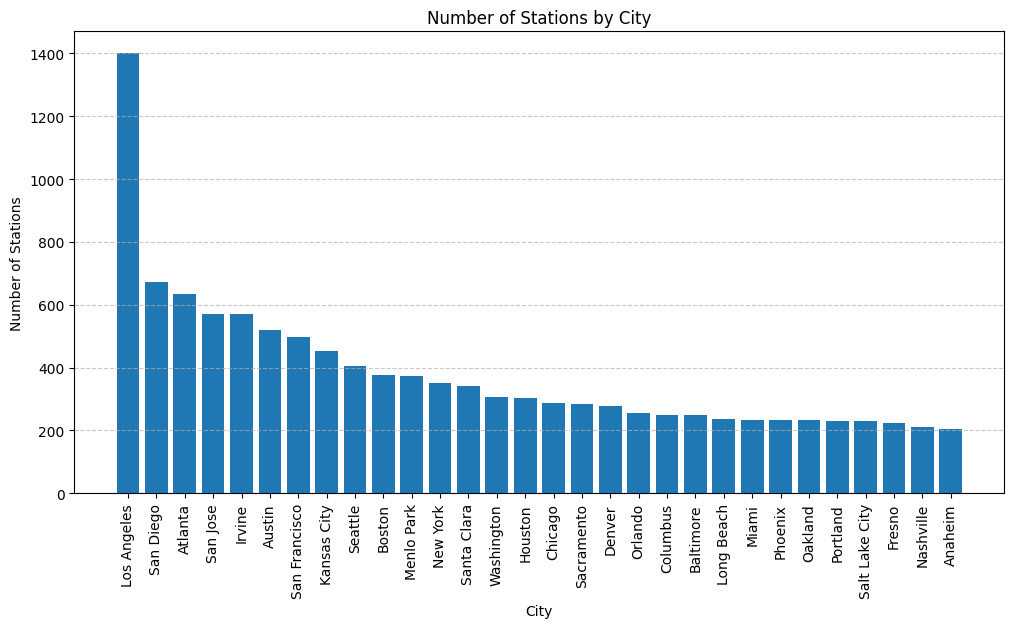

In [11]:
# Bar plot of number of stations by city
city_filtered = city[:30]
plt.figure(figsize=(12, 6))
plt.bar(city_filtered.index, city_filtered.values)
plt.xlabel("City")
plt.ylabel("Number of Stations")
plt.title("Number of Stations by City")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.show()

In [6]:
coordinates = df.dropna(subset=['Latitude', 'Longitude'])
lats = coordinates['Latitude'].tolist()
lons = coordinates['Longitude'].tolist()

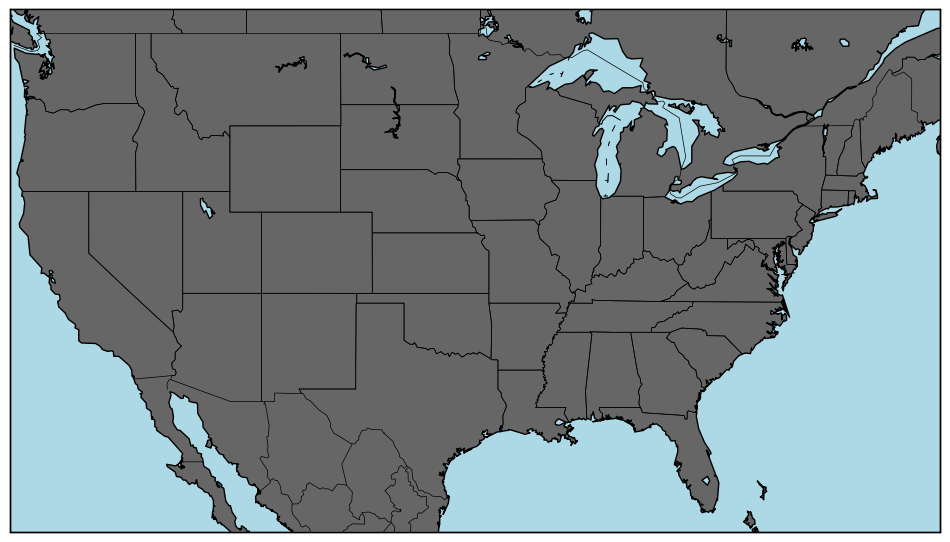

In [19]:
plt.figure(figsize=(12, 8))
USMap = Basemap(projection="merc", llcrnrlat=24, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-66, resolution="l")
USMap.drawcoastlines()
USMap.drawcountries()
USMap.drawstates()
USMap.fillcontinents(color="#666666", lake_color="lightblue")
USMap.drawmapboundary(fill_color="lightblue") # Map without Alaska and Hawaii :(

In [8]:
facility_type = df['Facility Type'].value_counts()

In [9]:
facility_type

Facility Type
HOTEL                        2559
CAR_DEALER                   2375
OFFICE_BLDG                   884
FED_GOV                       870
SHOPPING_CENTER               824
MUNI_GOV                      686
UTILITY                       542
SHOPPING_MALL                 474
COLLEGE_CAMPUS                473
PAY_GARAGE                    416
PARKING_LOT                   361
INN                           357
GROCERY                       352
PARKING_GARAGE                335
RESTAURANT                    305
CONVENIENCE_STORE             276
BREWERY_DISTILLERY_WINERY     254
PARK                          220
HOSPITAL                      211
SCHOOL                        183
OTHER_ENTERTAINMENT           172
NATL_PARK                     143
REC_SPORTS_FACILITY           127
AIRPORT                       124
STATE_GOV                     121
MULTI_UNIT_DWELLING           113
LIBRARY                       104
GAS_STATION                    96
MUSEUM                         85


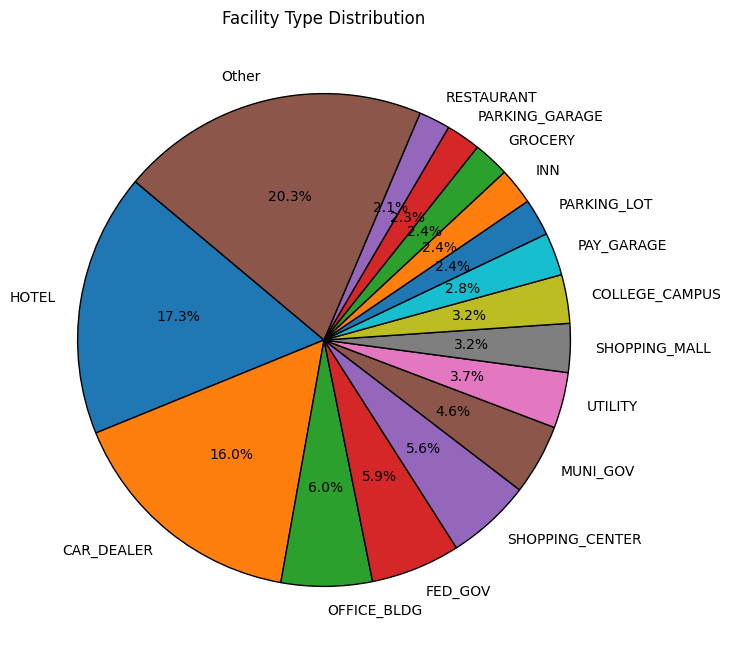

In [10]:
facility_type_labels = facility_type.index.to_list()
facility_type_sizes = facility_type.values.tolist()
threshold = 0.02 * sum(facility_type_sizes)
new_facility_type_labels = []
new_facility_type_sizes = []
other_total = 0
for label, size in zip(facility_type_labels, facility_type_sizes):
    if size < threshold:
        other_total += size
    else:
        new_facility_type_labels.append(label)
        new_facility_type_sizes.append(size)
new_facility_type_labels.append("Other")
new_facility_type_sizes.append(other_total)
plt.figure(figsize=(8, 8))
plt.pie(new_facility_type_sizes, labels=new_facility_type_labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Facility Type Distribution")
plt.show()

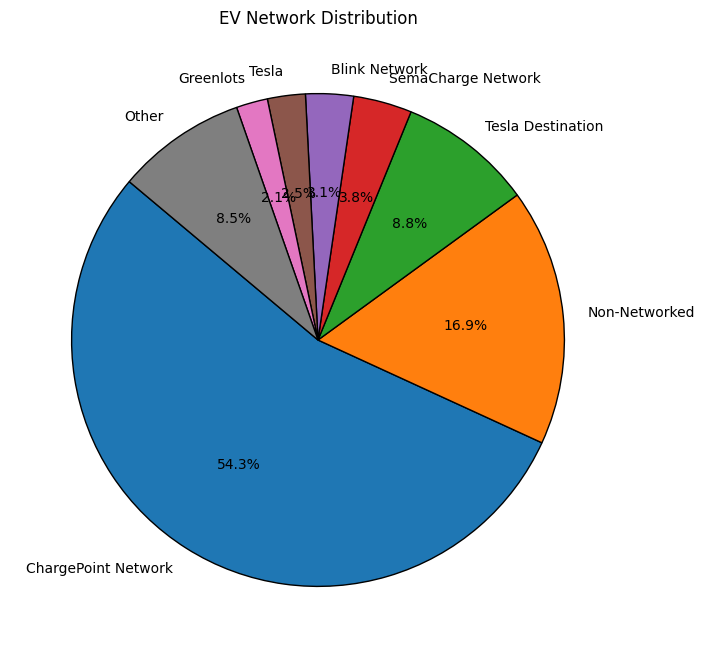

In [12]:
ev_network = df['EV Network'].value_counts()
ev_network
ev_network_labels = ev_network.index.to_list()
ev_network_sizes = ev_network.values.tolist()
threshold = 0.02 * sum(ev_network_sizes)
new_ev_network_labels = []
new_ev_network_sizes = []
other_total = 0
for label, size in zip(ev_network_labels, ev_network_sizes):
    if size < threshold:
        other_total += size
    else:
        new_ev_network_labels.append(label)
        new_ev_network_sizes.append(size)
new_ev_network_labels.append("Other")
new_ev_network_sizes.append(other_total)
plt.figure(figsize=(8, 8))
plt.pie(new_ev_network_sizes, labels=new_ev_network_labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("EV Network Distribution")
plt.show()

In [13]:
network_state_counts = df.groupby("State")["EV Network"].value_counts().unstack().fillna(0)

# plt.figure(figsize=(12, 8))
# sns.heatmap(network_state_counts, cmap="Blues", annot=False)
# plt.xlabel("EV Network")
# plt.ylabel("State")
# plt.title("EV Network Distribution by State")
# plt.show()

C:\Users\123\AppData\Local\Temp\ipykernel_51632\2307808621.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_network_map["EV Network"] = ev_network_map["EV Network"].apply(lambda x: x if x in network_colors else "Other")


Text(0.5, 1.0, 'EV Network Distribution Across the U.S.')

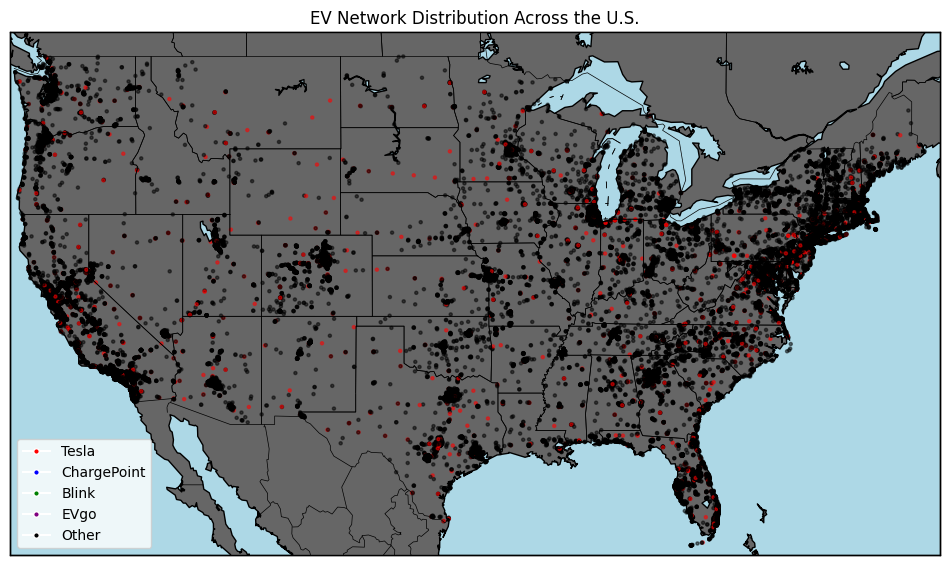

In [24]:
ev_network_map = df[df["EV Network"] != "Non-Networked"]
ev_network_map = df.dropna(subset=["Latitude", "Longitude", "EV Network"])

plt.figure(figsize=(12, 8))
USMap = Basemap(projection="merc", llcrnrlat=24, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-66, resolution="l")
USMap.drawcoastlines()
USMap.drawcountries()
USMap.drawstates()
USMap.fillcontinents(color="#666666", lake_color="lightblue")
USMap.drawmapboundary(fill_color="lightblue") # Map without Alaska and Hawaii :(
    
network_colors = {
    "Tesla": "red",
    "ChargePoint": "blue",
    "Blink": "green",
    "EVgo": "purple",
    "Other": "black"
}
ev_network_map["EV Network"] = ev_network_map["EV Network"].apply(lambda x: x if x in network_colors else "Other")

x, y = USMap(ev_network_map["Longitude"].values, ev_network_map["Latitude"].values)
colors = [network_colors[network] for network in ev_network_map["EV Network"].values]
plt.scatter(x, y, marker="o", c=colors, alpha=0.5, s=5)

plt.legend(handles=[plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=color, markersize=4, label=name) 
                    for name, color in network_colors.items()], loc="lower left")

plt.title("EV Network Distribution Across the U.S.")

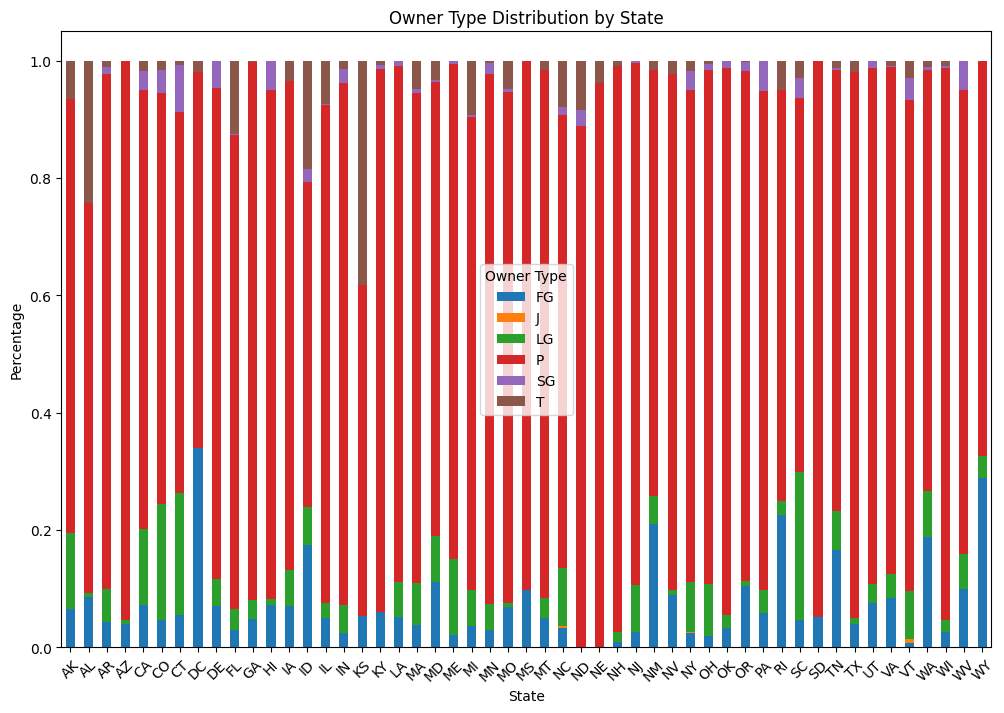

In [ ]:
# State vs Owner Separately

state_owner_data = df[['State', 'Owner Type Code']]
state_owner_data = state_owner_data.dropna(subset=['Owner Type Code'])
state_counts = df['State'].value_counts()

valid_states = state_counts[state_counts > 10].index
state_owner_filtered = state_owner_data[state_owner_data['State'].isin(valid_states)]

state_owner_counts = state_owner_filtered.groupby(['State', 'Owner Type Code']).size().unstack(fill_value=0)
state_owner_ratios = state_owner_counts.div(state_owner_counts.sum(axis=1), axis=0)

state_owner_ratios.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Owner Type Distribution by State")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.legend(title="Owner Type")
plt.xticks(rotation=45)

plt.show()

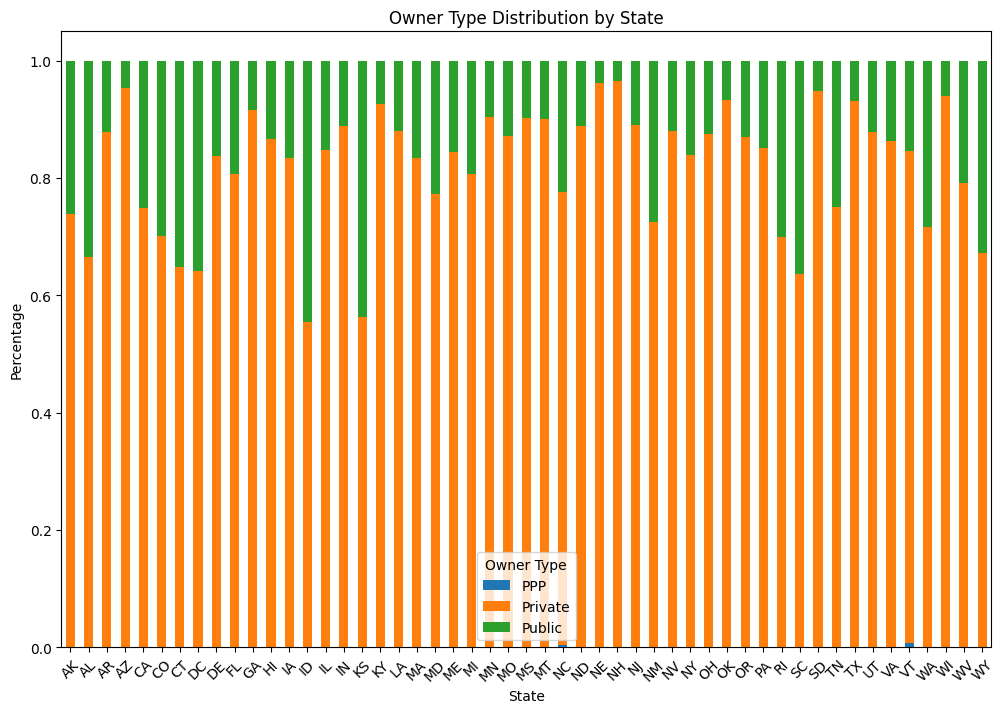

In [28]:
# State vs Owner Public/Private/PPP

state_owner_data = df[['State', 'Owner Type Code']]
state_owner_data = state_owner_data.dropna(subset=['Owner Type Code'])
state_counts = df['State'].value_counts()

state_owner_data.loc[state_owner_data['Owner Type Code'].isin(['FG', 'SG', 'LG', 'T']), 'Owner Type Code'] = 'Public'
state_owner_data.loc[state_owner_data['Owner Type Code'] == 'P', 'Owner Type Code'] = 'Private'
state_owner_data.loc[state_owner_data['Owner Type Code'] == 'J', 'Owner Type Code'] = 'PPP'

valid_states = state_counts[state_counts > 10].index
state_owner_filtered = state_owner_data[state_owner_data['State'].isin(valid_states)]

state_owner_counts = state_owner_filtered.groupby(['State', 'Owner Type Code']).size().unstack(fill_value=0)
state_owner_ratios = state_owner_counts.div(state_owner_counts.sum(axis=1), axis=0)

state_owner_ratios.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Owner Type Distribution by State")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.legend(title="Owner Type")
plt.xticks(rotation=45)

plt.show()

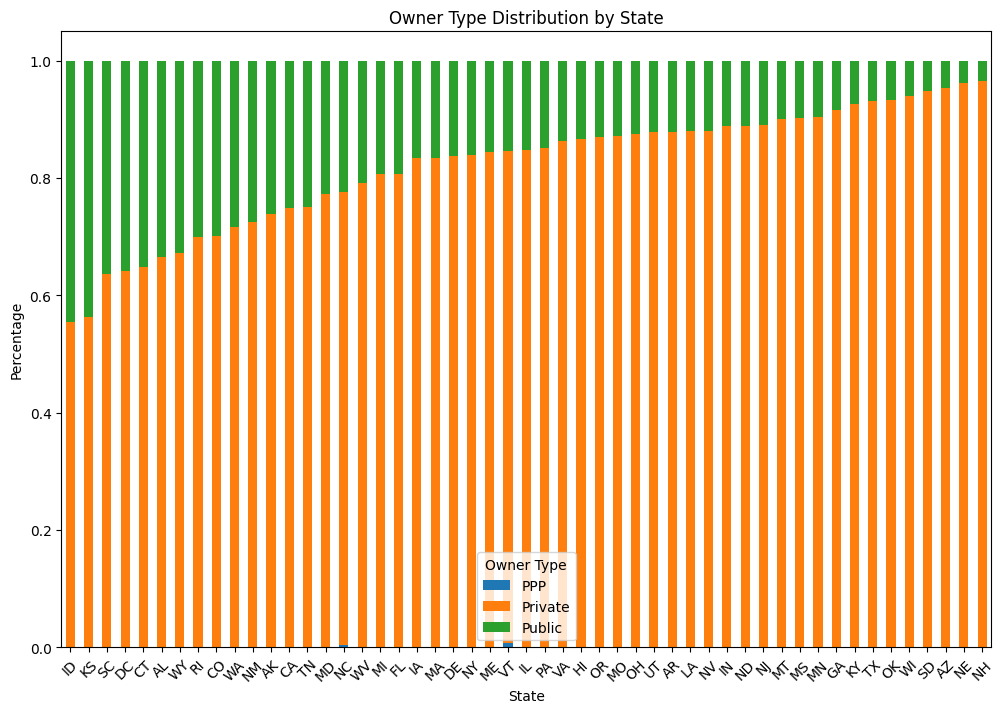

In [57]:
# State vs Owner Public/Private/PPP Sorted

state_owner_data = df[['State', 'Owner Type Code']]
state_owner_data = state_owner_data.dropna(subset=['Owner Type Code'])
state_counts = df['State'].value_counts()

state_owner_data.loc[state_owner_data['Owner Type Code'].isin(['FG', 'SG', 'LG', 'T']), 'Owner Type Code'] = 'Public'
state_owner_data.loc[state_owner_data['Owner Type Code'] == 'P', 'Owner Type Code'] = 'Private'
state_owner_data.loc[state_owner_data['Owner Type Code'] == 'J', 'Owner Type Code'] = 'PPP'

valid_states = state_counts[state_counts > 10].index
state_owner_filtered = state_owner_data[state_owner_data['State'].isin(valid_states)]

state_owner_counts = state_owner_filtered.groupby(['State', 'Owner Type Code']).size().unstack(fill_value=0)
state_owner_ratios = state_owner_counts.div(state_owner_counts.sum(axis=1), axis=0)

state_owner_ratios = state_owner_ratios.sort_values(by='Public', ascending=False)

state_owner_ratios.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Owner Type Distribution by State")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.legend(title="Owner Type")
plt.xticks(rotation=45)

plt.show()

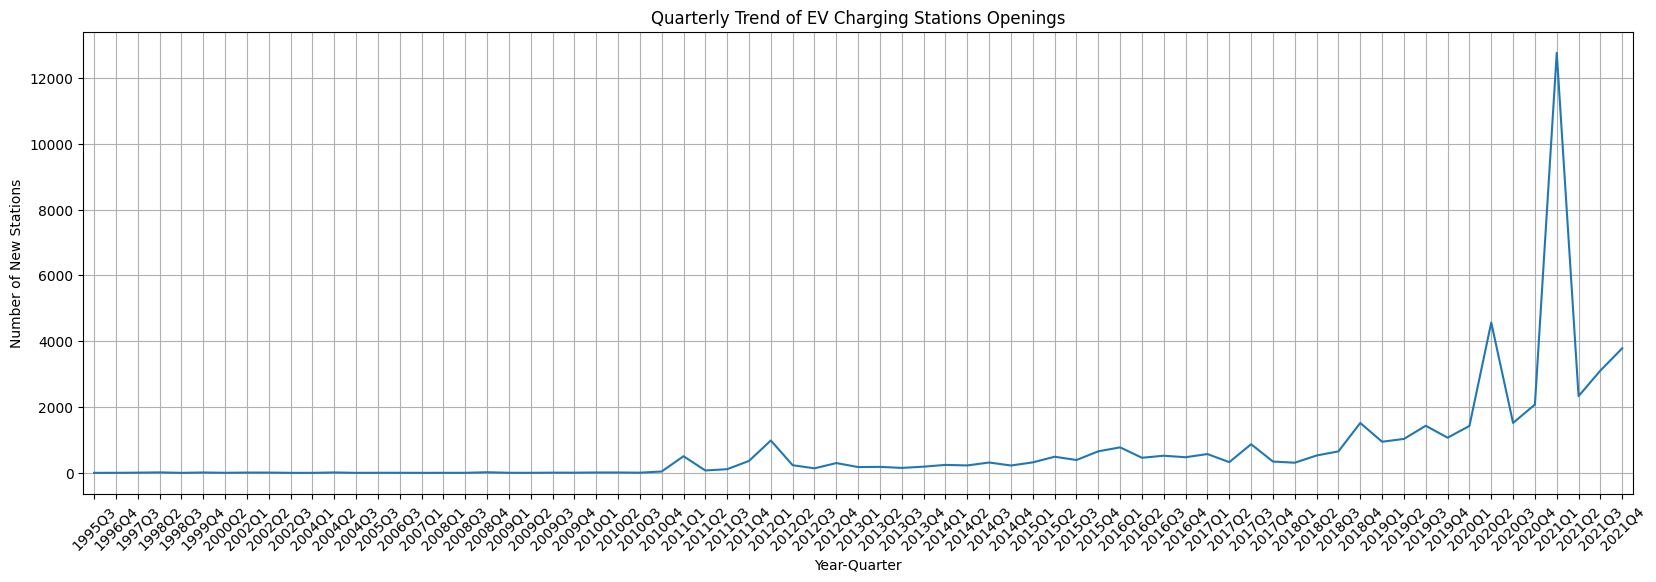

In [71]:
# Open Data Trend Quarterly

open_date_data = df[['Open Date']]
open_date_data = open_date_data.dropna(subset=['Open Date'])
open_date_data["Open Date"] = pd.to_datetime(df["Open Date"])
open_date_data = open_date_data[open_date_data["Open Date"] < "2022-01-01"]

open_date_data["Year-Quarter"] = open_date_data["Open Date"].dt.to_period("Q")
quarter_counts = open_date_data["Year-Quarter"].value_counts().sort_index()

plt.figure(figsize=(20, 6))
plt.xlim(-0.5, len(quarter_counts) - 0.5)
plt.plot(quarter_counts.index.astype(str), quarter_counts.values, marker="", linestyle="-")
plt.xlabel("Year-Quarter")
plt.ylabel("Number of New Stations")
plt.title("Quarterly Trend of EV Charging Stations Openings")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

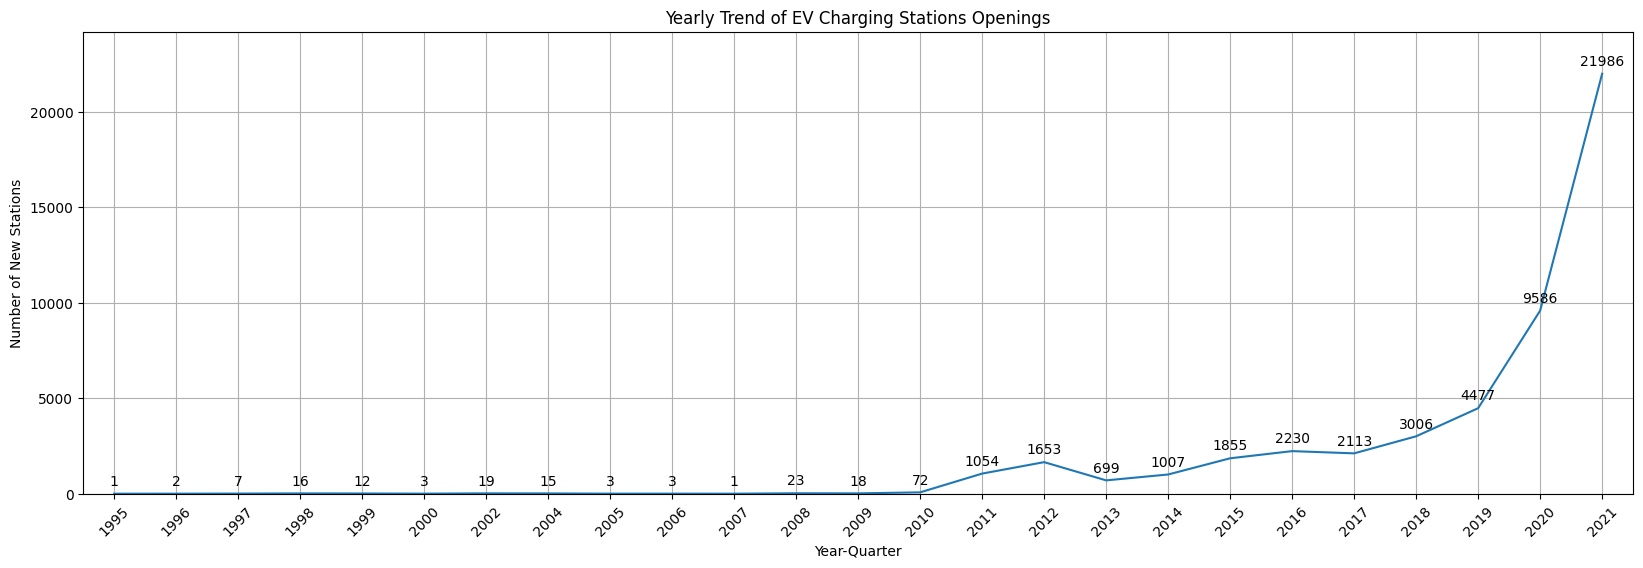

In [73]:
# Open Data Trend Yearly

open_date_data = df[['Open Date']]
open_date_data = open_date_data.dropna(subset=['Open Date'])
open_date_data["Open Date"] = pd.to_datetime(df["Open Date"])
open_date_data = open_date_data[open_date_data["Open Date"] < "2022-01-01"]

open_date_data["Year"] = open_date_data["Open Date"].dt.to_period("Y")
year_counts = open_date_data["Year"].value_counts().sort_index()

plt.figure(figsize=(20, 6))
plt.xlim(-0.5, len(year_counts) - 0.5)
plt.ylim(0, max(year_counts.values) * 1.1)
plt.plot(year_counts.index.astype(str), year_counts.values, marker="", linestyle="-")
for i, value in enumerate(year_counts.values):
    plt.text(i, value + max(year_counts.values) * 0.02, str(value), ha="center", fontsize=10, color="black")
plt.xlabel("Year-Quarter")
plt.ylabel("Number of New Stations")
plt.title("Yearly Trend of EV Charging Stations Openings")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

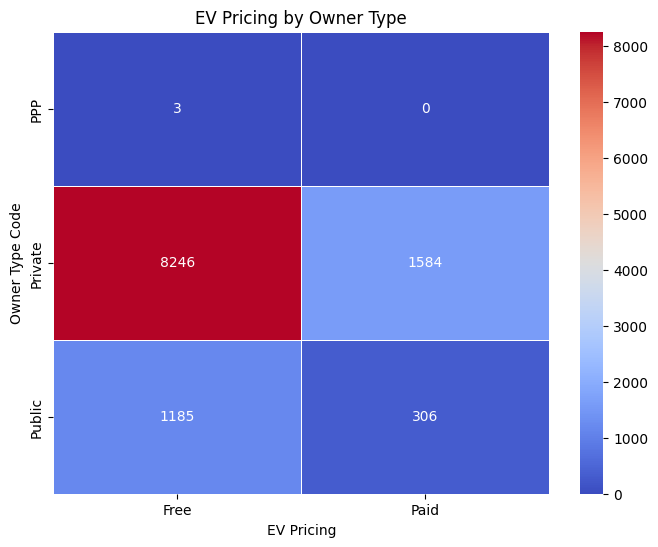

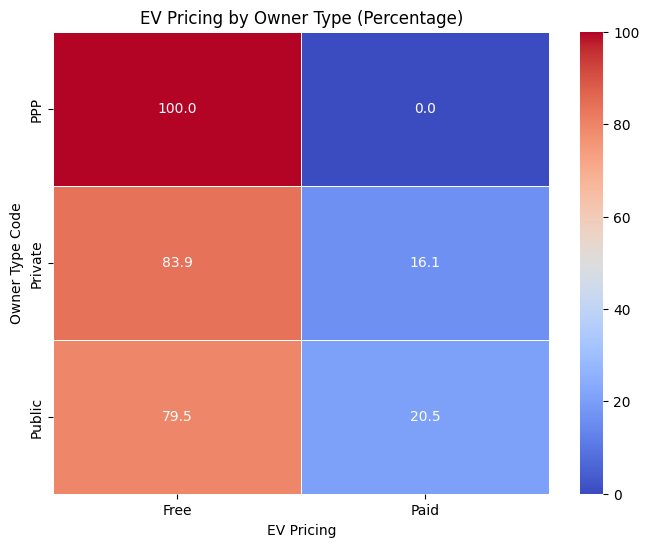

In [ ]:
# EV Pricing vs Public/Private/PPP

ev_pricing_data = df[['EV Pricing', 'Owner Type Code']]
ev_pricing_data = ev_pricing_data.dropna(subset=['EV Pricing', 'Owner Type Code'])

ev_pricing_data.loc[ev_pricing_data['Owner Type Code'].isin(['FG', 'SG', 'LG', 'T']), 'Owner Type Code'] = 'Public'
ev_pricing_data.loc[ev_pricing_data['Owner Type Code'] == 'P', 'Owner Type Code'] = 'Private'
ev_pricing_data.loc[ev_pricing_data['Owner Type Code'] == 'J', 'Owner Type Code'] = 'PPP'

ev_pricing_data["EV Pricing"] = ev_pricing_data["EV Pricing"].apply(
    lambda x: "Free" if str(x).strip()[:4].lower() == "free" else "Paid"
)

heatmap_data = ev_pricing_data.pivot_table(index="Owner Type Code", columns="EV Pricing", aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)
plt.title("EV Pricing by Owner Type")
plt.xlabel("EV Pricing")
plt.ylabel("Owner Type Code")

plt.show()

# EV Pricing vs Public/Private/PPP By Percentage

heatmap_data = ev_pricing_data.pivot_table(index="Owner Type Code", columns="EV Pricing", aggfunc="size", fill_value=0)

heatmap_percentage = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_percentage, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)

plt.title("EV Pricing by Owner Type (Percentage)")
plt.xlabel("EV Pricing")
plt.ylabel("Owner Type Code")

plt.show()